# Project 2 Dicoding Machine Learning Terapan: Music Recommendation System
### Nama: Junathan Richie
### Email: jonathanrichie05@gmail.com
### Username: junathan_richie_NU9i

### Importing Data

In [48]:
# !kaggle datasets download joebeachcapital/30000-spotify-songs

In [49]:
# !unzip 30000-spotify-songs.zip

### Data Understanding

Keterangan Data dari kaggle: 
- track_id: id unik dari lagu
- track_name: nama lagu
- track_artist: artis
- track_popularity: popularitas lagu dari range 1-100
- track_album_id: id unik dari album lagu
- track_album_name: nama dari album lagu
- track_album_release_date: tanggal rilis album
- playlist_name: nama dari playlist
- playlist_id: id playlist
- playlist_genre: genre dari playlist
- playlist_subgenre: subgenre dari playlist
- danceability: seberapa cocok sebuah lagu untuk ditarikan berdasarkan tempo, ritme, ketukan, dan lainnya. Nilai 1.0 berarti paling dapat ditarikan sedangkan 0.0 berarti tidak dapat ditarikan
- energy: energi diukur dalam rentang 0.0 hingga 1.0. Lagu yang energik terasa cepat, keras, dan berisik. Lagu dengan nilai energy tinggi seperti lagu death metal dan lagu dengan nilai energy rendah seperti Bach prelude. 
- key: estimasi kunci keseluruhan track yang dipetakan dalam integer seperti 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. 
- loudness: kekerasan suara dari rata-rata seluruh track. Dalam rentang -60dB hingga 0dB.
- mode: menunjukkan modality (mayor atau minor) dari lagu. Mayor dilambangkan dengan 1 dan minor dilambangkan dengan 0. 
- speechiness: menunjukkan seberapa banyak kata-kata yang diucapkan dalam track pada rentang 0.0 hingga 1.0. Semakin dekat dengan nilai 1.0 berarti semakin banyak kata yang diucapkan sehingga track itu mungkin saja sebuah podcast, audiobook, dan sebagainya. Nilai di atas 0,66 menggambarkan track yang mungkin seluruhnya terdiri dari kata-kata yang diucapkan. Nilai antara 0,33 dan 0,66 menggambarkan track yang mungkin berisi musik dan ucapan, baik dalam beberapa bagian atau berlapis, termasuk kasus seperti musik rap. Nilai di bawah 0,33 kemungkinan besar mewakili musik dan track lain yang tidak ada ucapan.
- acousticness: ukuran kepercayaan apakah sebuah lagu akustik, nilai 1.0 berarti sangat diyakini bahwa lagu itu adalah lagu akustik.
- instrumentalness: ukuran kepercayaan apakah sebuah lagu bersifat non-vocal (hanya instrumental). Semakin  mendekati nilai 1.0 berarti semakin diyakini bahwa track tersebut adalah instrumental
- liveness: liveness mendeteksi apakah ada penonton pada track itu. Apabila ada penonton, maka track tersebut cenderung dibuat secara live. Nilai di atas 0.8 menunjukkan bahwa sangat diakini bahwa track tersebut dibuat secara live. 
- valence: digunakan untuk mengukur tingkat musical positiveness dari sebuah track. Track dengan nilai valence tinggi menunjukkan track terdengar positive (happy, cheerful) sedangkan nilai valence rendah menunjukkan track memiliki terdengar negative.
- tempo: perkiraan tempo dari keseluruhan track dalam BPM (beats per minute)
- duration_ms: durasi lagu dalam milliseconds

#### Univariate Explaratory Data Analysis

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
raw_data = pd.read_csv("spotify_songs.csv")
raw_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [51]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [52]:
raw_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Banyak track pada data: 28356
Banyak artis pada data: 10693
Banyak album pada data: 22545


/tmp/ipykernel_10829/733281582.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kategori", y="Jumlah", data=data, palette="pastel", legend=False)


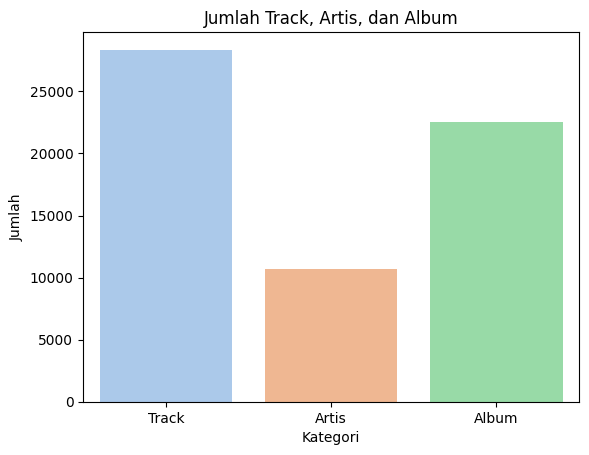

In [53]:
jumlah_track = len(raw_data.track_id.unique())
jumlah_artis = len(raw_data.track_artist.unique())
jumlah_album = len(raw_data.track_album_id.unique())
print(f"Banyak track pada data: {jumlah_track}")
print(f"Banyak artis pada data: {jumlah_artis}")
print(f"Banyak album pada data: {jumlah_album}")

data = pd.DataFrame({
    "Kategori": ["Track", "Artis", "Album"],
    "Jumlah": [jumlah_track, jumlah_artis, jumlah_album]
})

sns.barplot(x="Kategori", y="Jumlah", data=data, palette="pastel", legend=False)
plt.title("Jumlah Track, Artis, dan Album")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

##### Popularity

/tmp/ipykernel_10829/3381050621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


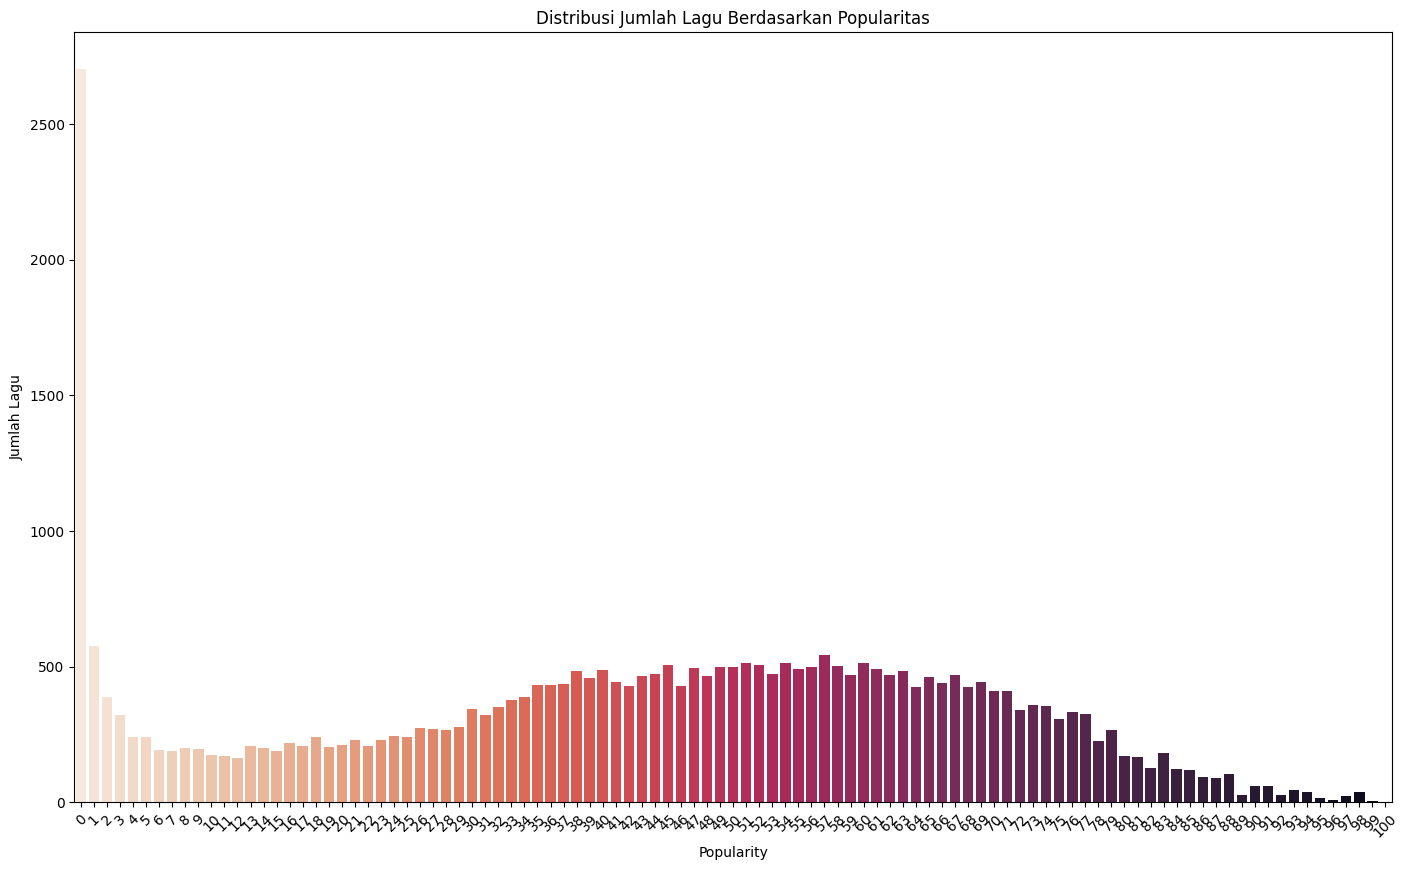

In [54]:
popularity_counts = raw_data["track_popularity"].value_counts().reset_index()
popularity_counts.columns = ["popularity", "count"]

# Plot
plt.figure(figsize=(17, 10))
sns.barplot(
    x="popularity", 
    y="count", 
    data=popularity_counts.sort_values(by="popularity"), 
    palette="rocket_r"
)
plt.title("Distribusi Jumlah Lagu Berdasarkan Popularitas")
plt.xlabel("Popularity")
plt.ylabel("Jumlah Lagu")
plt.xticks(rotation=45)
plt.show()

Berdasarkan bar di atas, terlihat bahwa sebagian besar data memiliki popularity 0, dan sebagian besar tersebar di antara 55-75.

##### Track Album Release Date

In [ ]:
# ubah format object menjadi datetime
def parse_date(date):
    try:
        if len(date) == 4:  # Format hanya tahun
            return pd.to_datetime(date, format='%Y')
        elif len(date) == 7: 
            return pd.to_datetime(date, format='%Y-%m')
        elif len(date) == 20:
            return pd.to_datetime(date, format='%Y-%m-%d %H-%M-%s')
        else: 
            return pd.to_datetime(date, format='%Y-%m-%d')
    except:
        print(date)
        return pd.NaT

raw_data["track_album_release_date"] = raw_data["track_album_release_date"].apply(parse_date)
raw_data

/tmp/ipykernel_10829/2586588503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


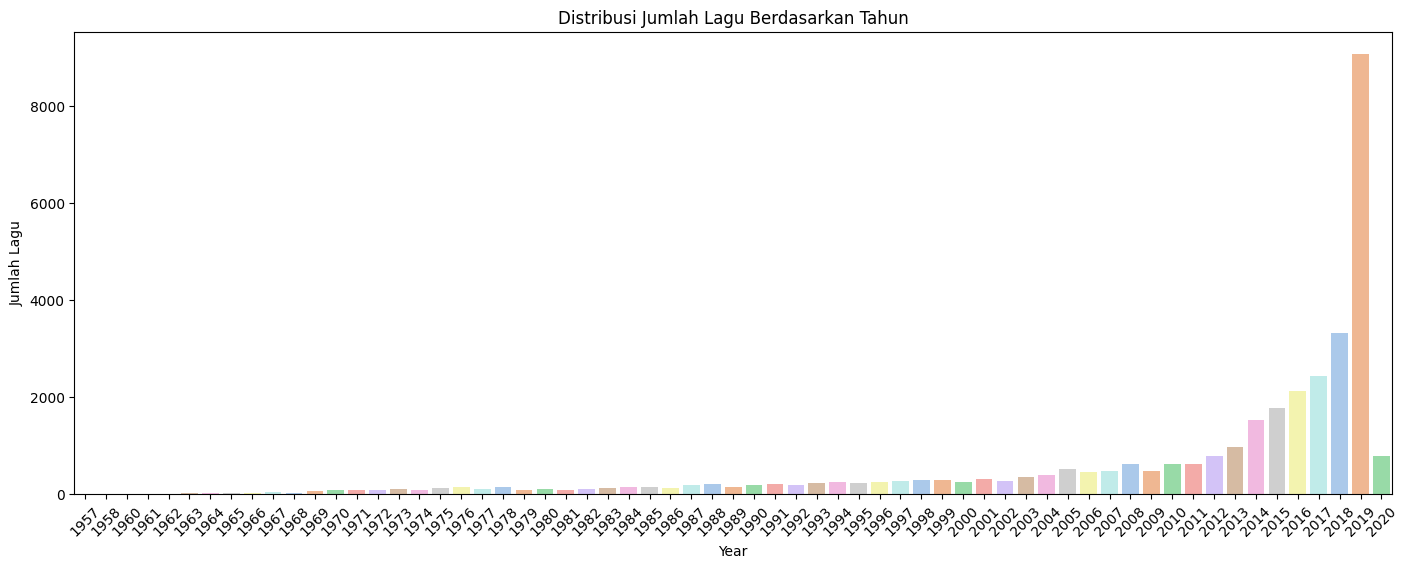

In [ ]:
year_counts = raw_data.track_album_release_date.dt.year.value_counts().reset_index()
year_counts.columns = ["year", "count"]

# Plot
plt.figure(figsize=(17, 6))
sns.barplot(
    x="year", 
    y="count", 
    data=year_counts.sort_values(by="year"),
    palette="pastel",
)
plt.title("Distribusi Jumlah Lagu Berdasarkan Tahun")
plt.xlabel("Year")
plt.ylabel("Jumlah Lagu")
plt.xticks(rotation=45)
plt.show()

Data di atas menunjukkan sebagian besar track berada pada tahun 2010 ke atas dan terbanyak pada tahun 2019. 

##### Playlist

In [ ]:
jumlah_playlist = len(raw_data.playlist_id.unique())
jumlah_genre = len(raw_data.playlist_genre.unique())
jumlah_subgenre = len(raw_data.playlist_subgenre.unique())
print(f"Jumlah playlist: {jumlah_playlist}")
print(f"Contoh Nama playlist: {pd.Series(raw_data['playlist_name'].unique()).sample(5).to_list()}")
print(f"Jumlah genre: {jumlah_genre}")
print(f"Nama genre: {raw_data.playlist_genre.unique()}")
print(f"Jumlah subgenre: {jumlah_subgenre}")
print(f"Nama subgenre: {raw_data.playlist_subgenre.unique()}")

Jumlah playlist: 471
Contoh Nama playlist: ['Orgulho Tropical', 'ElectroPop', 'Classic Rock Now', 'Latin Pop VIP', 'post teen pop']
Jumlah genre: 6
Nama genre: ['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
Jumlah subgenre: 24
Nama subgenre: ['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']


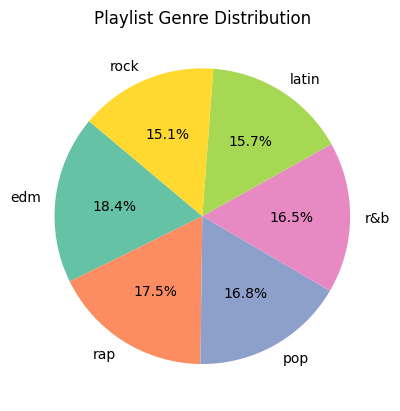

In [ ]:
genre_counts = raw_data.playlist_genre.value_counts().reset_index()
genre_counts.columns = ["genre", "count"]
plt.pie(genre_counts["count"], labels=genre_counts["genre"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Playlist Genre Distribution')
plt.show()

Perbandingan Genre terlihat tersebar secara merata berdasarkan pie chart di atas. 

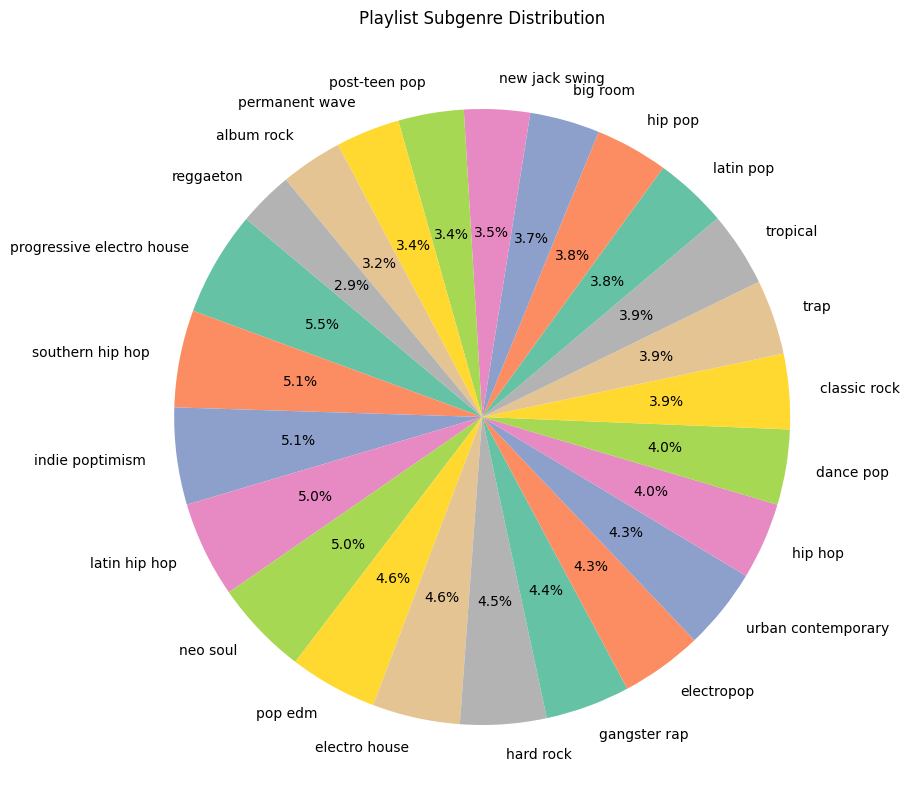

In [ ]:
subgenre_counts = raw_data.playlist_subgenre.value_counts().reset_index()
subgenre_counts.columns = ["subgenre", "count"]
# Plot
plt.figure(figsize=(10, 10))
plt.pie(subgenre_counts["count"], labels=subgenre_counts["subgenre"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Playlist Subgenre Distribution')
plt.show()

Penyebaran subgenre cukup merata, tidak ada subgenre yang menonjol sendiri. 

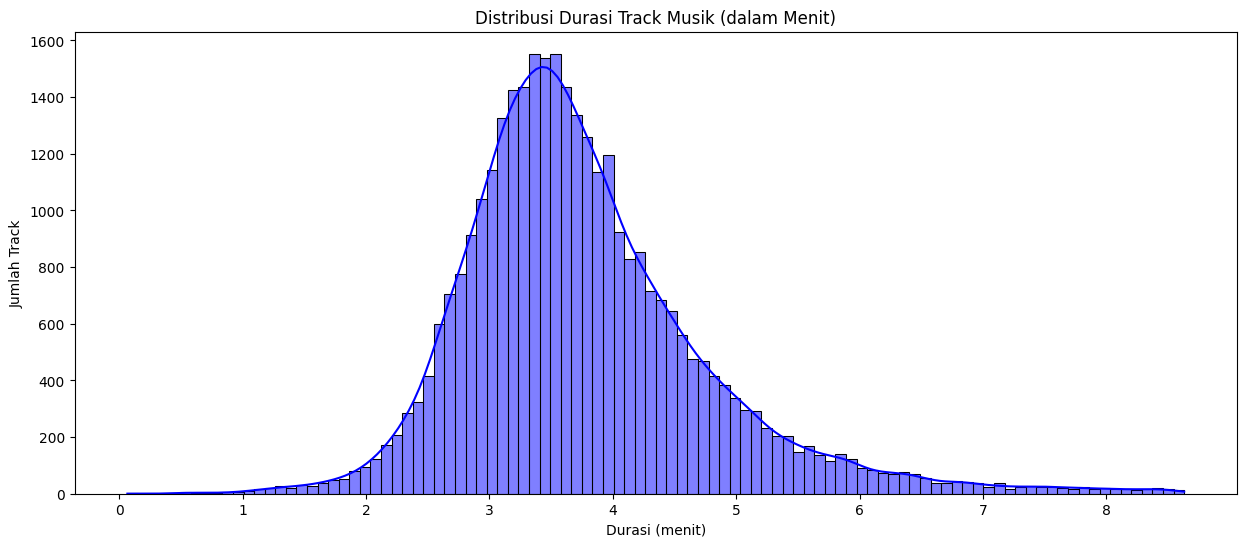

In [ ]:
raw_data['duration_min'] = raw_data['duration_ms'] / (1000 * 60)

plt.figure(figsize=(15, 6))
sns.histplot(raw_data['duration_min'], bins=100, kde=True, color='blue')
plt.title('Distribusi Durasi Track Musik (dalam Menit)')
plt.xlabel('Durasi (menit)')
plt.xticks(range(0, int(raw_data['duration_min'].max()) + 1, 1))
plt.ylabel('Jumlah Track')
plt.show()

Sebagian besar track berada pada durasi 3-4 menit

##### Key

   key  count
0   C#   4010
1    C   3454
2    G   3352
3    A   3027
4    B   2996
5    D   2827
6    F   2680
7   F#   2670
8   G#   2430
9   A#   2273
10   E   2201
11  D#    913


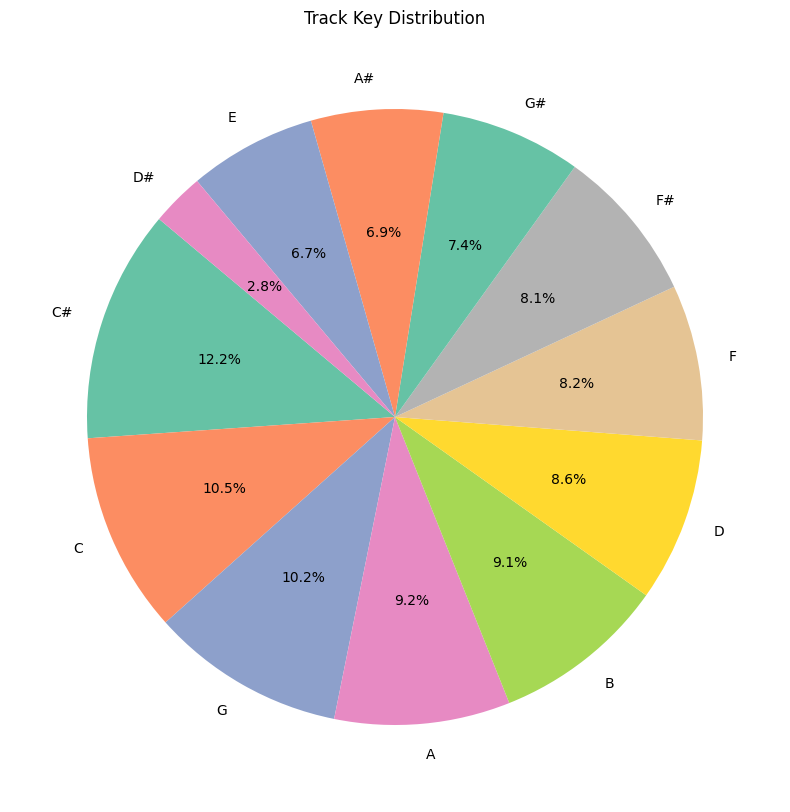

In [ ]:
key_counts = raw_data.key.value_counts().reset_index()
key_counts.columns = ["key", "count"]
key_counts["key"] = key_counts["key"].map({
    0: "C",
    1: "C#",
    2: "D",
    3: "D#",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "G#",
    9: "A",
    10: "A#",
    11: "B"
})
print(key_counts)
plt.figure(figsize=(10, 10))
plt.pie(key_counts["count"], labels=key_counts["key"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Track Key Distribution')
plt.show()

Nada dasar C, C#, dan G menjadi nada dasar yang paling banyak digunakan dalam track lagu. Nada D# menjadi nada dasar yang paling sedikit digunakan. Hal ini menunjukkan distribusi preferensi kunci dari komposer ketika membuat lagu. 

##### Mode

    mode  count
0  Major  18574
1  Minor  14259


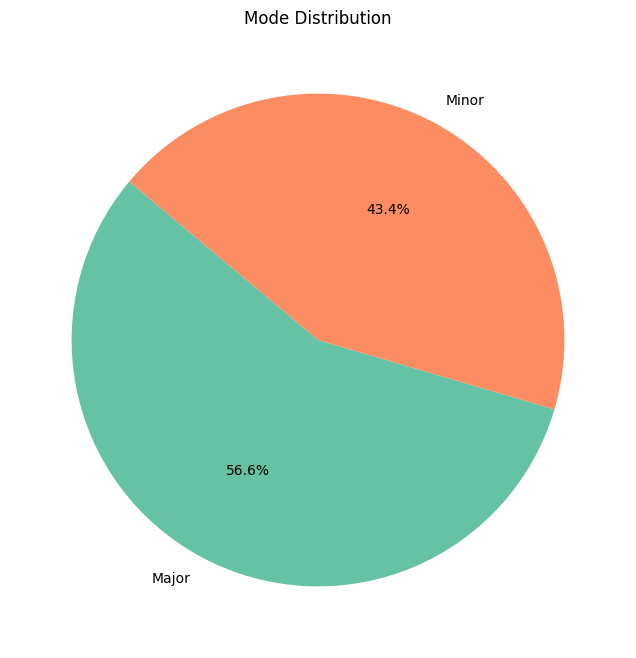

In [ ]:
mode_counts = raw_data["mode"].value_counts().reset_index()
mode_counts.columns = ["mode", "count"]
mode_counts["mode"] = mode_counts["mode"].map({
    0: "Minor",
    1: "Major"
})
print(mode_counts)
plt.figure(figsize=(8, 8))
plt.pie(mode_counts["count"], labels=mode_counts["mode"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Mode Distribution')
plt.show()

Mode menunjukkan lebih banyak track memiliki nada dasar major.

##### Music Characteristic

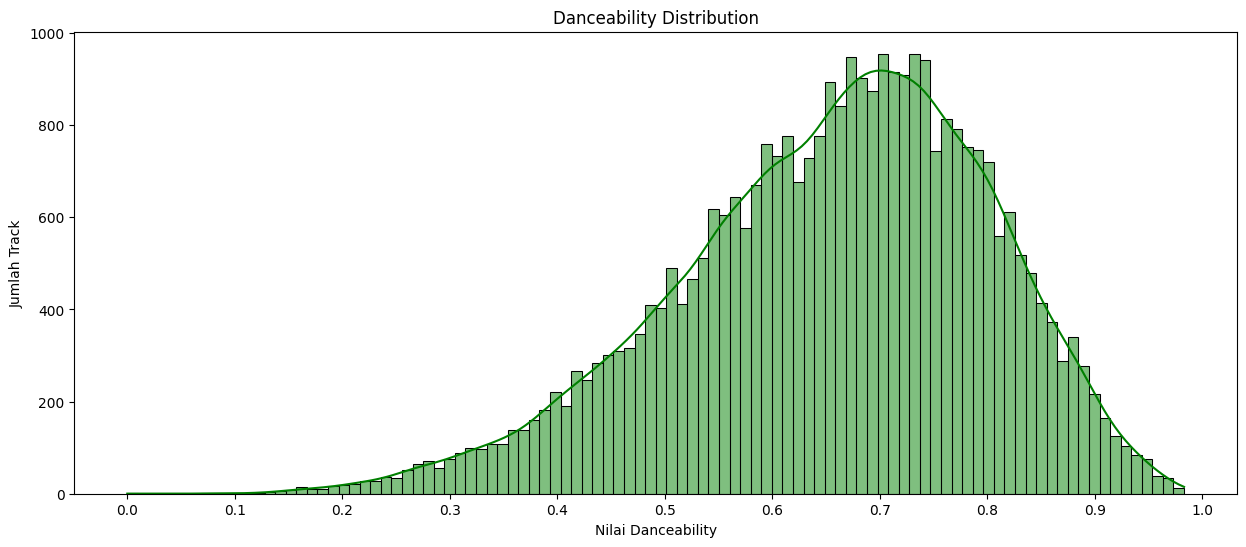

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['danceability'], bins=100, kde=True, color='green')
plt.title('Danceability Distribution')
plt.xlabel('Nilai Danceability')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

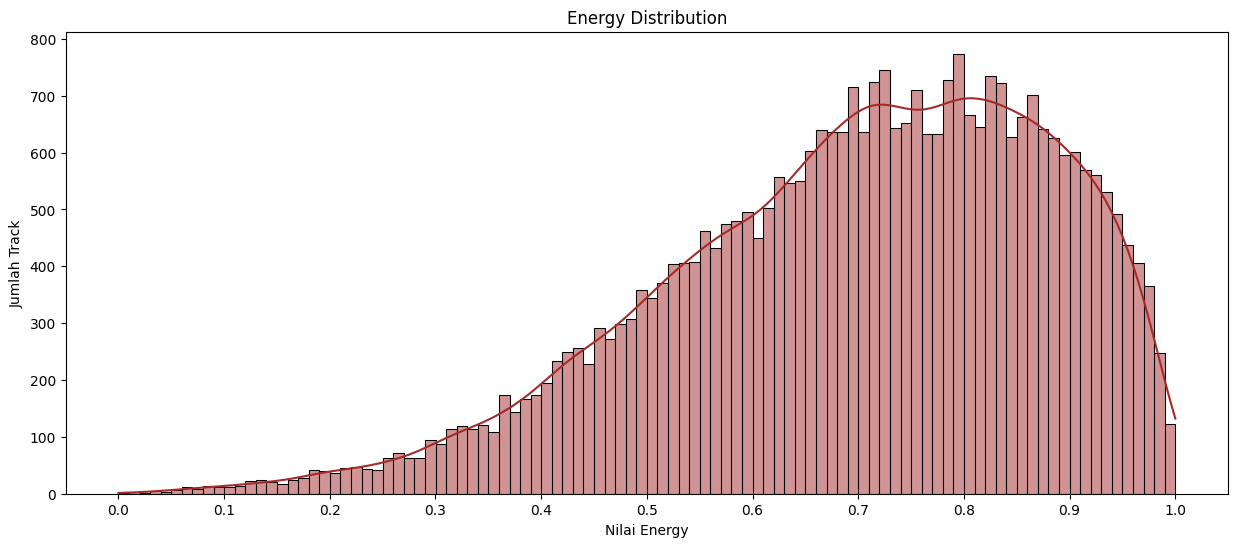

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['energy'], bins=100, kde=True, color='brown')
plt.title('Energy Distribution')
plt.xlabel('Nilai Energy')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

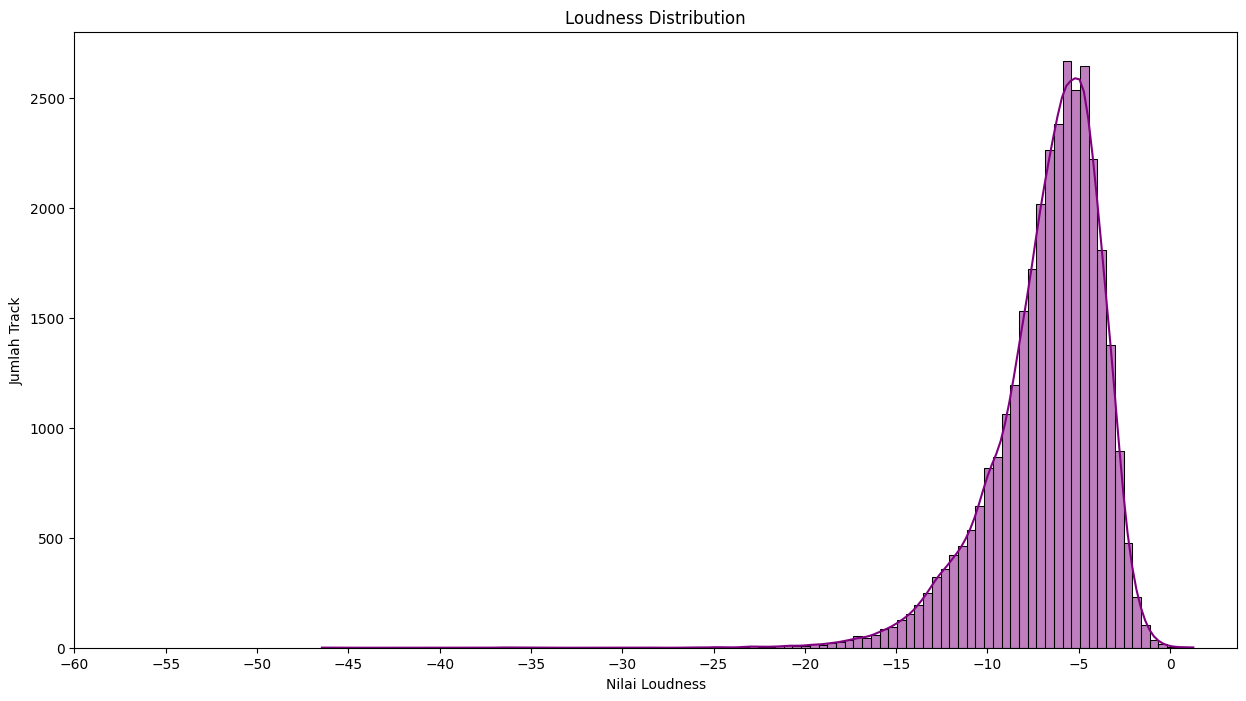

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(raw_data['loudness'], bins=100, kde=True, color='purple')
plt.title('Loudness Distribution')
plt.xlabel('Nilai Loudness')
plt.xticks(ticks=np.arange(-60, 5, 5))
plt.ylabel('Jumlah Track')
plt.show()

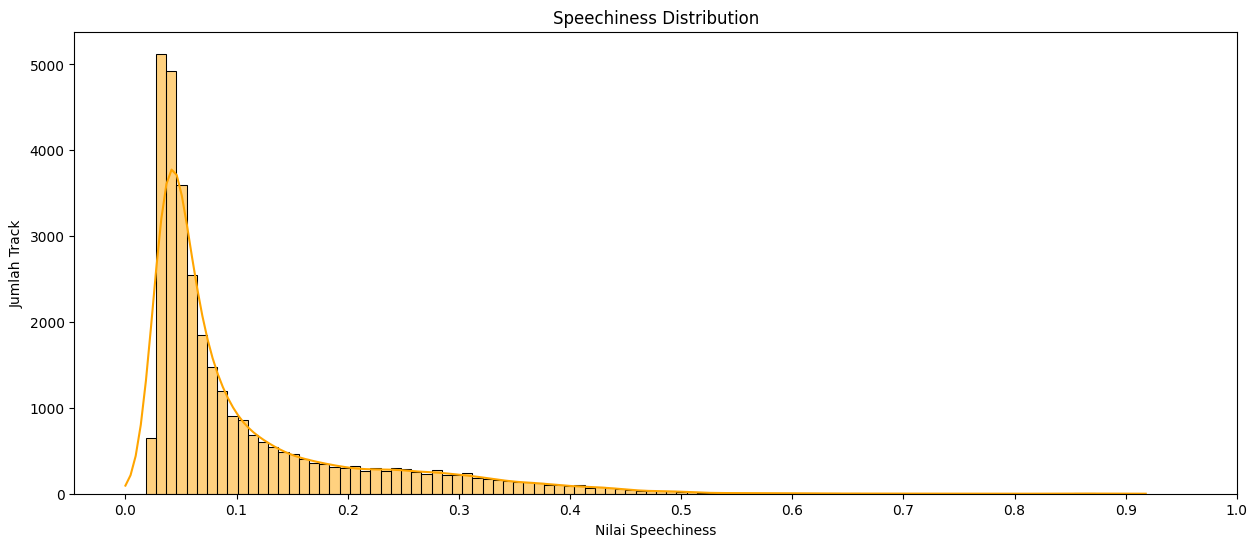

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['speechiness'], bins=100, kde=True, color='orange')
plt.title('Speechiness Distribution')
plt.xlabel('Nilai Speechiness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

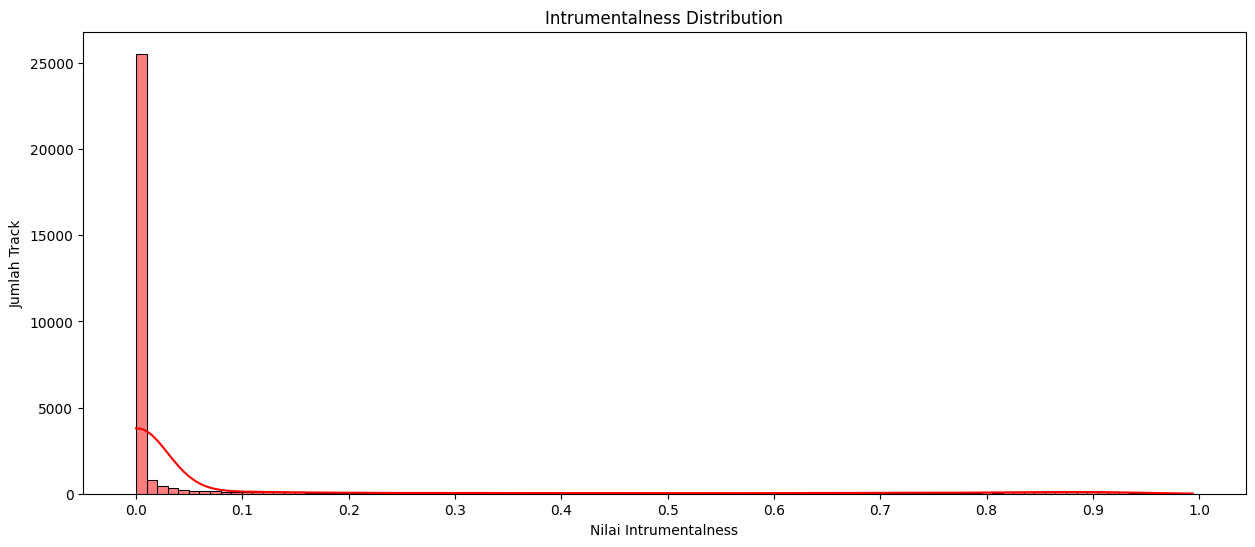

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['instrumentalness'], bins=100, kde=True, color='red')
plt.title('Intrumentalness Distribution')
plt.xlabel('Nilai Intrumentalness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

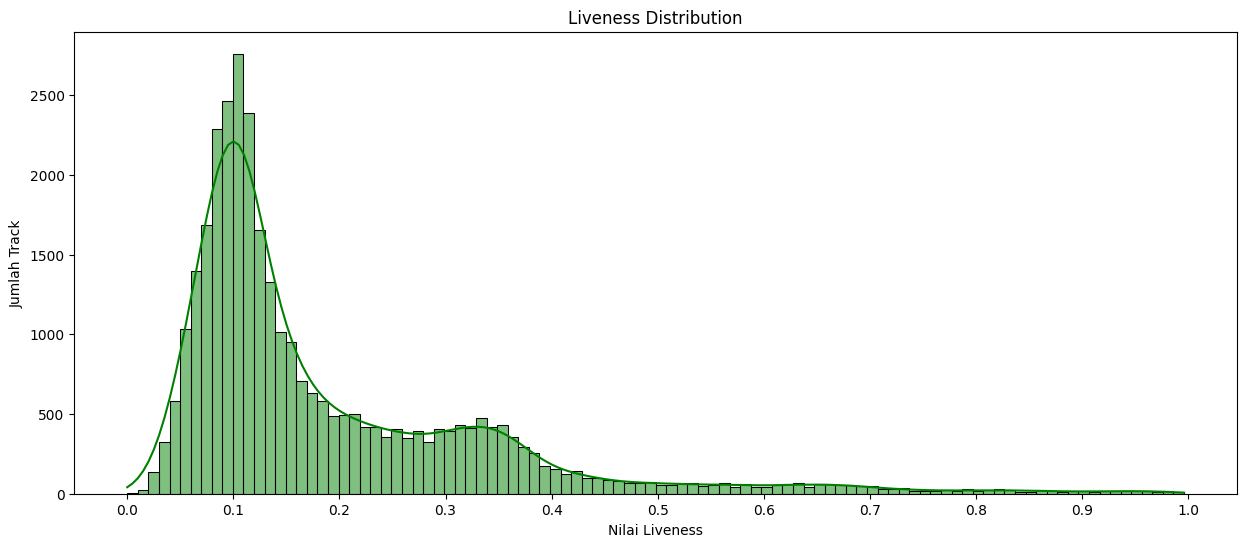

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['liveness'], bins=100, kde=True, color='green')
plt.title('Liveness Distribution')
plt.xlabel('Nilai Liveness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

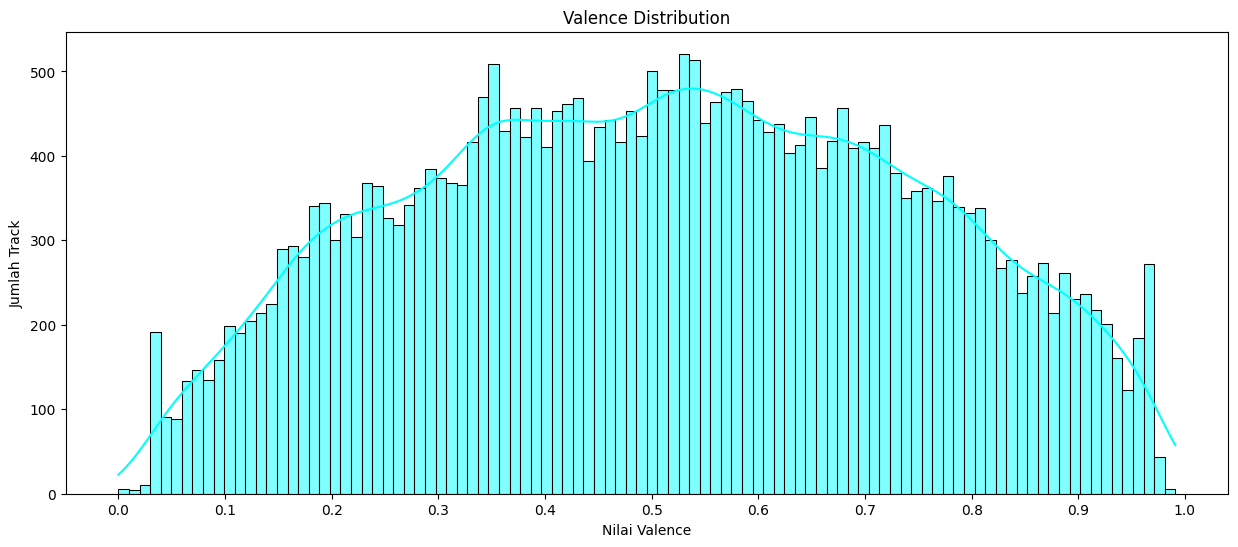

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['valence'], bins=100, kde=True, color='cyan')
plt.title('Valence Distribution')
plt.xlabel('Nilai Valence')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

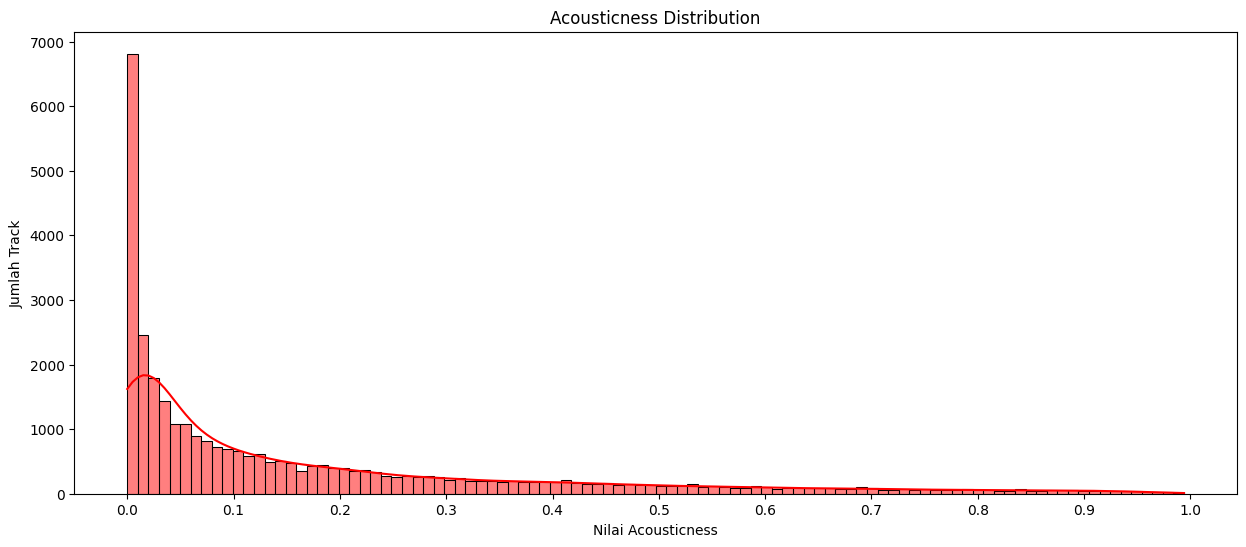

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['acousticness'], bins=100, kde=True, color='red')
plt.title('Acousticness Distribution')
plt.xlabel('Nilai Acousticness')
plt.xticks(ticks=np.arange(0, 1.1, 0.1))
plt.ylabel('Jumlah Track')
plt.show()

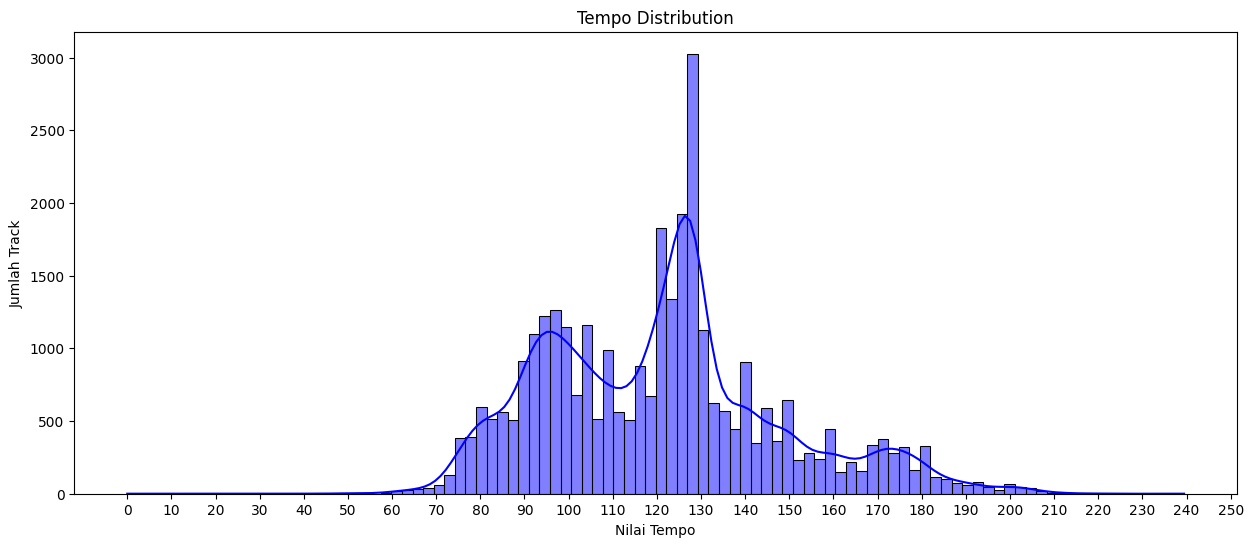

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(raw_data['tempo'], bins=100, kde=True, color='blue')
plt.title('Tempo Distribution')
plt.xlabel('Nilai Tempo')
plt.xticks(np.arange(0, 260, 10))
plt.ylabel('Jumlah Track')
plt.show()

### Data Preparation

#### Cek Data Null

In [ ]:
raw_data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
duration_min                0
dtype: int64

In [ ]:
# Melihat null data
null_data = raw_data[raw_data.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,4.711783
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,3.370583
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,3.441083
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,4.212883
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,4.711783


Karena data yang null memiliki ketidakjelasan identitas baik dari sisi penyanyi, nama track, dan memiliki popularity 0 maka saya memutuskan untuk menghapus data null. 

In [ ]:
preprocessed_data = raw_data.dropna()
preprocessed_data.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
duration_min                0
dtype: int64

In [ ]:
duplicates_by_track_id = preprocessed_data[preprocessed_data.duplicated(subset=['track_id'], keep=False)]
duplicates_sorted_track_id = duplicates_by_track_id.sort_values(by='track_id')
duplicates_sorted_track_id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
32084,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,-4.894,1,0.0421,0.0249,0.000000,0.3610,0.134,130.001,188000,3.133333
28696,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Big Room EDM - by Spinnin' Records,7xWdFCrU5Gka6qp1ODrSdK,edm,...,-4.894,1,0.0421,0.0249,0.000000,0.3610,0.134,130.001,188000,3.133333
9387,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,RAP Gangsta,1Z1gW89x4MSBjkvVjGg7DQ,rap,...,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893,3.798217
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893,3.798217
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,-4.573,1,0.4080,0.0521,0.000000,0.0568,0.552,171.966,227893,3.798217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32074,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,-4.755,1,0.1130,0.0512,0.000315,0.2340,0.415,127.964,204375,3.406250
28932,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Bounce United,08QTrfsYYouffgnPjmllAQ,edm,...,-4.755,1,0.1130,0.0512,0.000315,0.2340,0.415,127.964,204375,3.406250
2850,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,ElectroPop 2020,4frhr6RQM2fMOm2mpvOVo6,pop,...,-5.092,0,0.0432,0.0736,0.000000,0.1560,0.501,92.943,185360,3.089333
20517,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,Latin/Hip Hop/Dancehall/Soca,2rg9LCyvaMQvnCE2hVndpR,latin,...,-5.092,0,0.0432,0.0736,0.000000,0.1560,0.501,92.943,185360,3.089333


Dari data di atas, terlihat bahwa track_id duplicate menunjukkan bahwa track tersebut sama. Data duplicate ini harus didrop untuk menghidari rekomendasi yang bersifat duplicate. 

In [ ]:
# Drop data
removed_duplicates_by_id = preprocessed_data.drop_duplicates(subset=['track_id'], keep='first')
# Check duplicates
duplicates_by_track_id = removed_duplicates_by_id[removed_duplicates_by_id.duplicated(subset=['track_id'], keep=False)]
duplicates_sorted_track_id = duplicates_by_track_id.sort_values(by='track_id')
duplicates_sorted_track_id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min


Drop data berdasarkan track_id berhasil.

In [ ]:
# Check duplicates berdasarkan track name dan artists
duplicates_by_track_name_and_artist = removed_duplicates_by_id[removed_duplicates_by_id.duplicated(subset=["track_name", "track_artist"], keep=False)]
duplicates_sorted = duplicates_by_track_name_and_artist.sort_values(by='track_name')
duplicates_sorted

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
6037,7kBdenpTmgWfAz9clmBcok,#1 Stunna,Big Tymers,48,7pe02mW4PQwNJkrmSup7bu,I Got That Work,2000-01-01,Hip-Hop Drive,37i9dQZF1DWUFmyho2wkQU,rap,...,-4.961,1,0.2850,0.0176,0.003270,0.2580,0.561,89.017,281960,4.699333
7075,5xGxl3Iux0worDz9tLbaDn,#1 Stunna,Big Tymers,0,688cR89wVSFrXVj56N59g6,I Got That Work (Explicit Version),2000-01-01,Dirty South Rap Classics by DJ HOTSAUCE,0tLHH1C4HkWEUCXXSSjbOe,rap,...,-4.984,1,0.2840,0.0150,0.004040,0.2580,0.569,89.070,281960,4.699333
14503,65NTcXUtOb27NHKQ4fAcw0,'39 - 2011 Mix,Queen,60,75eP8LZolyNBpqIRyB5pvB,A Night At The Opera (Deluxe Edition 2011 Rema...,1975-11-21,I didn’t know perm stood for permanent (wave),3e6gYPyrTbaB8BWgSHCt5j,rock,...,-9.686,1,0.0273,0.0271,0.000000,0.1110,0.373,101.626,210800,3.513333
12103,6aNP9GlBi3VHPXl7w3Qjr9,'39 - 2011 Mix,Queen,46,1GbtB4zTqAsyfZEsm1RZfx,A Night At The Opera (2011 Remaster),1975-11-21,The Queen - La Discografia Completa,3E88dLx4fgFYY70gdGzdnB,rock,...,-9.686,1,0.0273,0.0271,0.000000,0.1110,0.373,101.626,210800,3.513333
8558,6yr8GiTHWvFfi4o6Q5ebdT,'Till I Collapse,Eminem,16,1ftvBBcu7jYIvXyt3JWB8S,The Eminem Show,2002-05-26,Gangster Rap,5joQabz9ys3XPGbSx5CaKv,rap,...,-3.277,1,0.1970,0.0748,0.000000,0.0784,0.100,171.411,297893,4.964883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,35mUPbEWBUMq6TLl0tkDMk,Сарума,Kaspiyskiy Gruz,27,1XZD2mM4TSMZhvIddq4YBU,Треникиспортивки (Лучшее),2014-04-01,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,...,-7.099,0,0.1790,0.4260,0.000012,0.2210,0.567,81.961,142316,2.371933
9451,18uskcQGHADKwukSPngyYP,Табор уходит в небо,Kaspiyskiy Gruz,23,0mulB8qakm5MacvJSUgPhW,The Best of Каспийский Груз,2018-01-16,RUSSIAN Gangster Rap,0Jw0HckkxCfIrOvpN081eV,rap,...,-10.169,1,0.1320,0.0978,0.000003,0.1530,0.148,78.756,208862,3.481033
8665,2RIT8c120eYHcg38tBuVTj,Табор уходит в небо,Kaspiyskiy Gruz,49,6eSeqTpExVhsAasGwRO55x,Сторона а сторона б,2015-01-26,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,...,-10.166,1,0.1350,0.0960,0.000003,0.1490,0.151,78.732,208862,3.481033
9443,1rmvDAMlsBggMQBzbro2rX,Яд,Местный,1,3Z4ZQKtYzh8rQ7bodahxXy,Кругозор,2018-11-15,RUSSIAN Gangster Rap,0Jw0HckkxCfIrOvpN081eV,rap,...,-3.530,1,0.1810,0.1380,0.000000,0.0743,0.795,88.098,158746,2.645767


Ternyata selain dari track_id, ada data musik yang masih sama juga berdasarkan name dan artist-nya. Maka, saya menghapus data duplicate dan mengambil data dengan popularity tertinggi. 

In [ ]:
# Menghapus duplikat dengan memilih track_popularity tertinggi
cleaned_data = (
    removed_duplicates_by_id.loc[
        removed_duplicates_by_id.groupby(["track_name", "track_artist"])["track_popularity"].idxmax()
    ]
)
duplicates_by_track_name_and_artist = cleaned_data[cleaned_data.duplicated(subset=["track_name", "track_artist"], keep=False)]
duplicates_sorted = duplicates_by_track_name_and_artist.sort_values(by='track_name')
duplicates_sorted

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min


Drop data berhasil

In [ ]:
cleaned_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,duration_min
9827,0WEI3cNqwQ1nyWYsBw3n7f,"""I TRIED FOR YEARS... NOBODY LISTENED""",Iceberg Black,18,33HL1PHasNglK2aUYwxG8f,WAR,2018-09-22,Rap Party 24/7 Radio / Gangsta Rap,4sGnz2x5tbHE2YlW1nemfb,rap,...,-6.712,0,0.1410,0.026800,0.001790,0.116,0.0944,140.026,150909,2.515150
3391,5jCOeqjJRnRo27b9Hb8xHp,"""This Is Seagull….""",The Snake Corps,34,60P4s9euug8W1iqDEYVKmL,Smother Earth,1990-01-01,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",2nRWtTI9a2LWjJ9Wy3JZs5,pop,...,-13.288,0,0.0295,0.000002,0.857000,0.110,0.2350,135.903,238227,3.970450
6037,7kBdenpTmgWfAz9clmBcok,#1 Stunna,Big Tymers,48,7pe02mW4PQwNJkrmSup7bu,I Got That Work,2000-01-01,Hip-Hop Drive,37i9dQZF1DWUFmyho2wkQU,rap,...,-4.961,1,0.2850,0.017600,0.003270,0.258,0.5610,89.017,281960,4.699333
23207,3PYjJW2UuhMUUP1TSF9NDD,#NAKAMA,XLII,26,2LGXdk4yoQZnnoBoxrj8iP,#NAKAMA,2019-12-25,Girl On Fire,37i9dQZF1DX4F2k37fMTyn,r&b,...,-3.204,1,0.0545,0.385000,0.000157,0.318,0.5680,108.041,192094,3.201567
19853,3cRJo0hXMcrXa7oLfAUU4d,#Natural,Paty Cantú,50,6gi1JqZbK74yWCKTpiC022,#Natural,2017-10-20,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,-3.535,0,0.0568,0.114000,0.000000,0.134,0.8160,97.023,227013,3.783550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26359,62pLjWF5RRPQg3mPCLDwf7,숙녀 (淑女) Lady,Yubin,17,340MUbVwBnwhqVACCdOSdj,都市女子,2018-06-05,Japanese Funk/Soul/NEO/Jazz/Acid,4zNayWuATXCAA9gaXvnFnq,r&b,...,-3.378,1,0.1700,0.234000,0.000051,0.400,0.8470,119.810,196093,3.268217
30518,37Gq1KAg6bV3KAp32xOoFL,쉼표,Kozypop,30,6LHDppZ2sqbcy3uNub0duJ,"Seoul Vibes, Pt​. 4",2018-10-01,K-Crazy Michioso Tunes,37i9dQZF1DWUXxc8Mc6MmJ,edm,...,-4.144,0,0.2000,0.855000,0.000000,0.196,0.3770,82.199,150178,2.502967
30481,7MirWQBco3ZiuwvcdYaNSe,중독 Overdose,EXO-K,4,5P76th5WUjiqXxTYIgTXsG,The 2nd Mini Album '중독 Overdose',2014-08-06,K-Crazy Michioso Tunes,37i9dQZF1DWUXxc8Mc6MmJ,edm,...,-1.797,0,0.1640,0.061500,0.000000,0.358,0.6520,112.357,205612,3.426867
445,42tFTth2jcF7iSo0RBjfJF,피카부 Peek-A-Boo,Red Velvet,70,0rvrbZvaDX5S9ZBhwOwFfH,Perfect Velvet - The 2nd Album,2017-11-17,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,...,-3.612,0,0.0536,0.086800,0.002570,0.272,0.6390,114.953,189050,3.150833


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26229 entries, 9827 to 471
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  26229 non-null  object        
 1   track_name                26229 non-null  object        
 2   track_artist              26229 non-null  object        
 3   track_popularity          26229 non-null  int64         
 4   track_album_id            26229 non-null  object        
 5   track_album_name          26229 non-null  object        
 6   track_album_release_date  26229 non-null  datetime64[ns]
 7   playlist_name             26229 non-null  object        
 8   playlist_id               26229 non-null  object        
 9   playlist_genre            26229 non-null  object        
 10  playlist_subgenre         26229 non-null  object        
 11  danceability              26229 non-null  float64       
 12  energy                

Kolom duration_ms dan duration_min bersifat redundant karena memberikan informasi yang sama. Oleh karena itu, kolom duration_ms dapat didrop.

In [ ]:
cleaned_data.drop(columns=['duration_ms'], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26229 entries, 9827 to 471
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  26229 non-null  object        
 1   track_name                26229 non-null  object        
 2   track_artist              26229 non-null  object        
 3   track_popularity          26229 non-null  int64         
 4   track_album_id            26229 non-null  object        
 5   track_album_name          26229 non-null  object        
 6   track_album_release_date  26229 non-null  datetime64[ns]
 7   playlist_name             26229 non-null  object        
 8   playlist_id               26229 non-null  object        
 9   playlist_genre            26229 non-null  object        
 10  playlist_subgenre         26229 non-null  object        
 11  danceability              26229 non-null  float64       
 12  energy                

track_id tidak penting karena tidak memberikan informasi apa-apa mengenai track sehingga dapat didrop. Selain itu, data_track_album_id, playlist_id, data track_album_name dan playlist_name merupakan metadata yang tidak digunakan secara langsung pada sistem rekomendasi dan dapat didrop.

In [ ]:
cleaned_data.drop(columns=['track_id','track_album_name', 'playlist_name', 'track_album_id', 'playlist_id'], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26229 entries, 9827 to 471
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_name                26229 non-null  object        
 1   track_artist              26229 non-null  object        
 2   track_popularity          26229 non-null  int64         
 3   track_album_release_date  26229 non-null  datetime64[ns]
 4   playlist_genre            26229 non-null  object        
 5   playlist_subgenre         26229 non-null  object        
 6   danceability              26229 non-null  float64       
 7   energy                    26229 non-null  float64       
 8   key                       26229 non-null  int64         
 9   loudness                  26229 non-null  float64       
 10  mode                      26229 non-null  int64         
 11  speechiness               26229 non-null  float64       
 12  acousticness          

Release date yang berupa format datetime bisa diubah untuk mengambil tahunnya saja agar lebih sederhana. 

In [ ]:
cleaned_data['track_album_release_year'] = cleaned_data['track_album_release_date'].dt.year
cleaned_data['track_album_release_year'] = cleaned_data['track_album_release_year'].astype(int)
cleaned_data.drop(columns=['track_album_release_date'], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26229 entries, 9827 to 471
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                26229 non-null  object 
 1   track_artist              26229 non-null  object 
 2   track_popularity          26229 non-null  int64  
 3   playlist_genre            26229 non-null  object 
 4   playlist_subgenre         26229 non-null  object 
 5   danceability              26229 non-null  float64
 6   energy                    26229 non-null  float64
 7   key                       26229 non-null  int64  
 8   loudness                  26229 non-null  float64
 9   mode                      26229 non-null  int64  
 10  speechiness               26229 non-null  float64
 11  acousticness              26229 non-null  float64
 12  instrumentalness          26229 non-null  float64
 13  liveness                  26229 non-null  float64
 14  valence   

### Model Development

Normalisasi data dari kolom numerik dengan MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ["track_popularity", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_min", "track_album_release_year"]
scaler = MinMaxScaler()
data_normalized = cleaned_data.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data_normalized[numerical_cols])
data_normalized

,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,track_album_release_year
9827,"""I TRIED FOR YEARS... NOBODY LISTENED""",Iceberg Black,0.18,rap,gangster rap,0.929807,0.407896,0.909091,0.832638,0,0.153595,0.026962,0.001801,0.116466,0.095354,0.584806,0.285921,0.968254
3391,"""This Is Seagull….""",The Snake Corps,0.34,pop,electropop,0.524924,0.579926,0.818182,0.694843,0,0.032135,0.000002,0.862173,0.110442,0.237374,0.567587,0.455863,0.523810
6037,#1 Stunna,Big Tymers,0.48,rap,hip hop,0.561546,0.841972,0.727273,0.869329,1,0.310458,0.017706,0.003290,0.259036,0.566667,0.371772,0.540978,0.682540
23207,#NAKAMA,XLII,0.26,r&b,hip pop,0.810783,0.969995,0.272727,0.906146,1,0.059368,0.387324,0.000158,0.319277,0.573737,0.451224,0.366077,0.984127
19853,#Natural,Paty Cantú,0.50,latin,latin hip hop,0.813835,0.835971,0.000000,0.899210,0,0.061874,0.114688,0.000000,0.134538,0.824242,0.405208,0.434038,0.952381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26359,숙녀 (淑女) Lady,Yubin,0.17,r&b,neo soul,0.481180,0.972995,0.818182,0.902500,1,0.185185,0.235412,0.000051,0.401606,0.855556,0.500376,0.373860,0.968254
30518,쉼표,Kozypop,0.30,edm,pop edm,0.436419,0.723952,0.272727,0.886449,0,0.217865,0.860161,0.000000,0.196787,0.380808,0.343297,0.284498,0.968254
30481,중독 Overdose,EXO-K,0.04,edm,pop edm,0.506612,0.916985,0.454545,0.935629,0,0.178649,0.061871,0.000000,0.359438,0.658586,0.469249,0.392386,0.904762
445,피카부 Peek-A-Boo,Red Velvet,0.70,pop,dance pop,0.853510,0.901983,0.090909,0.897597,0,0.058388,0.087324,0.002586,0.273092,0.645455,0.480091,0.360153,0.952381


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(data_normalized[numerical_cols])
cosine_sim

array([[1.        , 0.83502549, 0.88531822, ..., 0.86414876, 0.82200777,
        0.82928399],
       [0.83502549, 1.        , 0.84701877, ..., 0.79262114, 0.75425716,
        0.7331988 ],
       [0.88531822, 0.84701877, 1.        , ..., 0.94936495, 0.91693339,
        0.89605988],
       ...,
       [0.86414876, 0.79262114, 0.94936495, ..., 1.        , 0.91920604,
        0.97538909],
       [0.82200777, 0.75425716, 0.91693339, ..., 0.91920604, 1.        ,
        0.94334976],
       [0.82928399, 0.7331988 , 0.89605988, ..., 0.97538909, 0.94334976,
        1.        ]], shape=(26229, 26229))

In [ ]:
# Fungsi untuk mencari rekomendasi lagu berdasarkan judul lagu yang dimasukkan
def get_song_recommendations(track_name, cosine_sim_matrix, data_normalized):
    # Menemukan index lagu berdasarkan track_name
    track_idx = data_normalized[data_normalized['track_name'] == track_name].index[0]
    if(track_idx == None):
        return "Lagu tidak ditemukan"
    # Mendapatkan nilai cosine similarity untuk lagu yang dimasukkan
    sim_scores = list(enumerate(cosine_sim_matrix[track_idx]))
    
    # Mengurutkan similarity dari yang tertinggi
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Mengambil 10 lagu teratas (excl. lagu yang dimasukkan)
    sim_scores = sim_scores[1:11]
    
    # Mendapatkan indeks lagu yang direkomendasikan
    song_indices = [i[0] for i in sim_scores]
    
    # Mengembalikan daftar judul lagu yang direkomendasikan
    recommended_songs = data_normalized['track_name'].iloc[song_indices]
    
    return recommended_songs

# Input judul lagu yang ingin dicari rekomendasinya
input_track_name = "I Know What You Did Last Summer"  # Gantilah dengan judul lagu yang Anda inginkan

# Mendapatkan rekomendasi lagu berdasarkan cosine similarity
recommended_songs = get_song_recommendations(input_track_name, cosine_sim, data_normalized)

# Menampilkan rekomendasi
print(f"Rekomendasi lagu untuk '{input_track_name}':")
print(recommended_songs)


IndexError: index 30701 is out of bounds for axis 0 with size 26229

In [44]:
data_normalized[data_normalized['track_name'] == "I Know What You Did Last Summer"]

,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,track_album_release_year
30701,I Know What You Did Last Summer,Shawn Mendes,0.72,edm,pop edm,0.707019,0.760958,0.818182,0.877271,0,0.094118,0.104628,0.0,0.14759,0.752525,0.475965,0.427888,0.920635
